In [1]:
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_colwidth", 200)

In [2]:

conn = psycopg2.connect(host="localhost",database="mimic", user="postgres", password='postgres', port = '5432')
cursor = conn.cursor()

In [4]:
sql = """
SELECT *
  FROM mimiciii.fluid_mv_dailytotal
  """
df = pd.read_sql_query(sql, conn)

In [16]:
df.head()

,subject_id,hadm_id,icustay_id,datestart,dailytotal_ml
0,55973,152234,200001.0,2181-11-25,1.083335
1,55973,152234,200001.0,2181-11-26,837.816657
2,55973,152234,200001.0,2181-11-27,731.306594
3,11861,192256,200010.0,2132-08-05,4029.513896
4,74032,117458,200016.0,2150-12-02,2156.447354


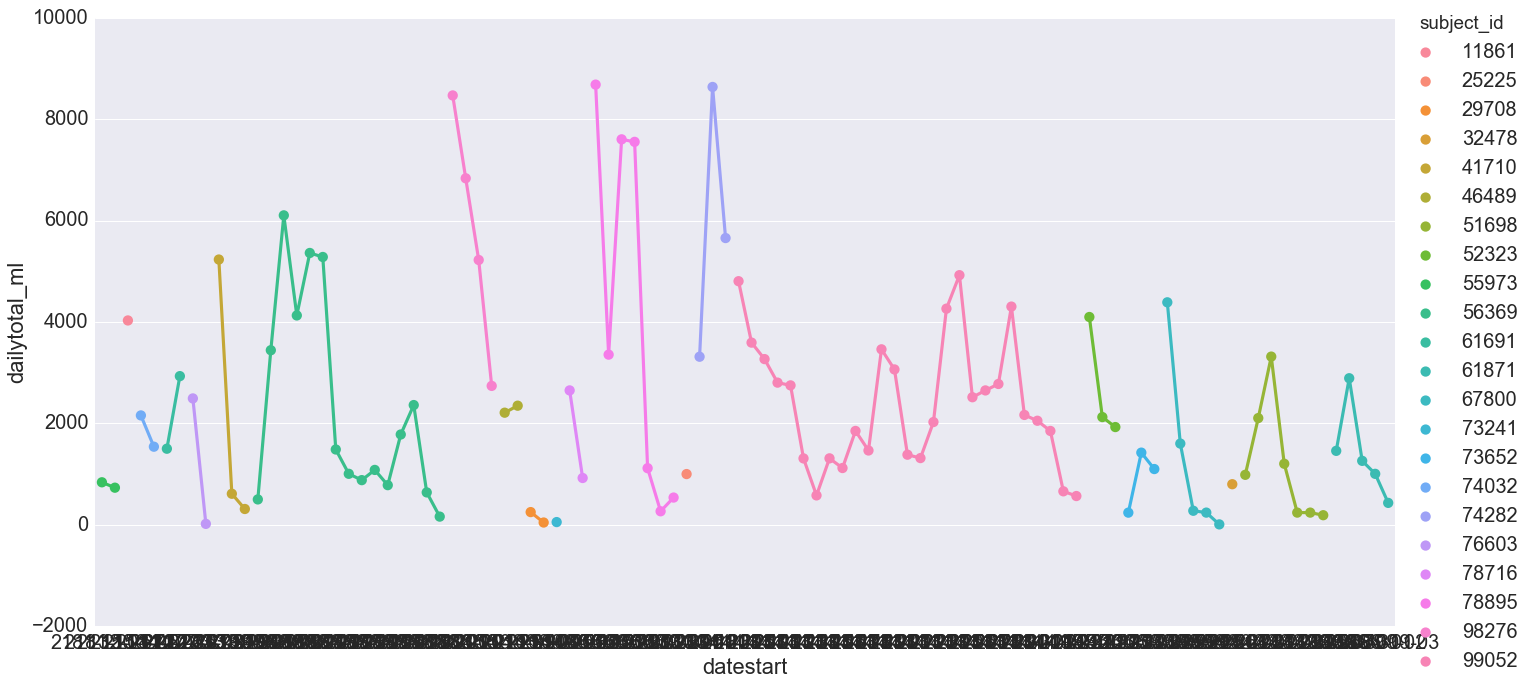

In [11]:
sns.set(font_scale=2)
sns.factorplot(x="datestart", y="dailytotal_ml", hue="subject_id", data=df.loc[1:100, :], legend='False', size=10, aspect = 2)

In [12]:
sql = """
SELECT *
  FROM mimiciii.fluid_cv_dailytotal
  """
dfcv = pd.read_sql_query(sql, conn)

In [13]:
dfcv.head()

,subject_id,hadm_id,icustay_id,chartdate,dailytotal_ml
0,3,145834.0,211552.0,2101-10-21,13807.5
1,3,145834.0,211552.0,2101-10-22,1240.0
2,3,145834.0,211552.0,2101-10-23,500.0
3,3,145834.0,211552.0,2101-10-24,480.0
4,3,145834.0,211552.0,2101-10-25,460.0


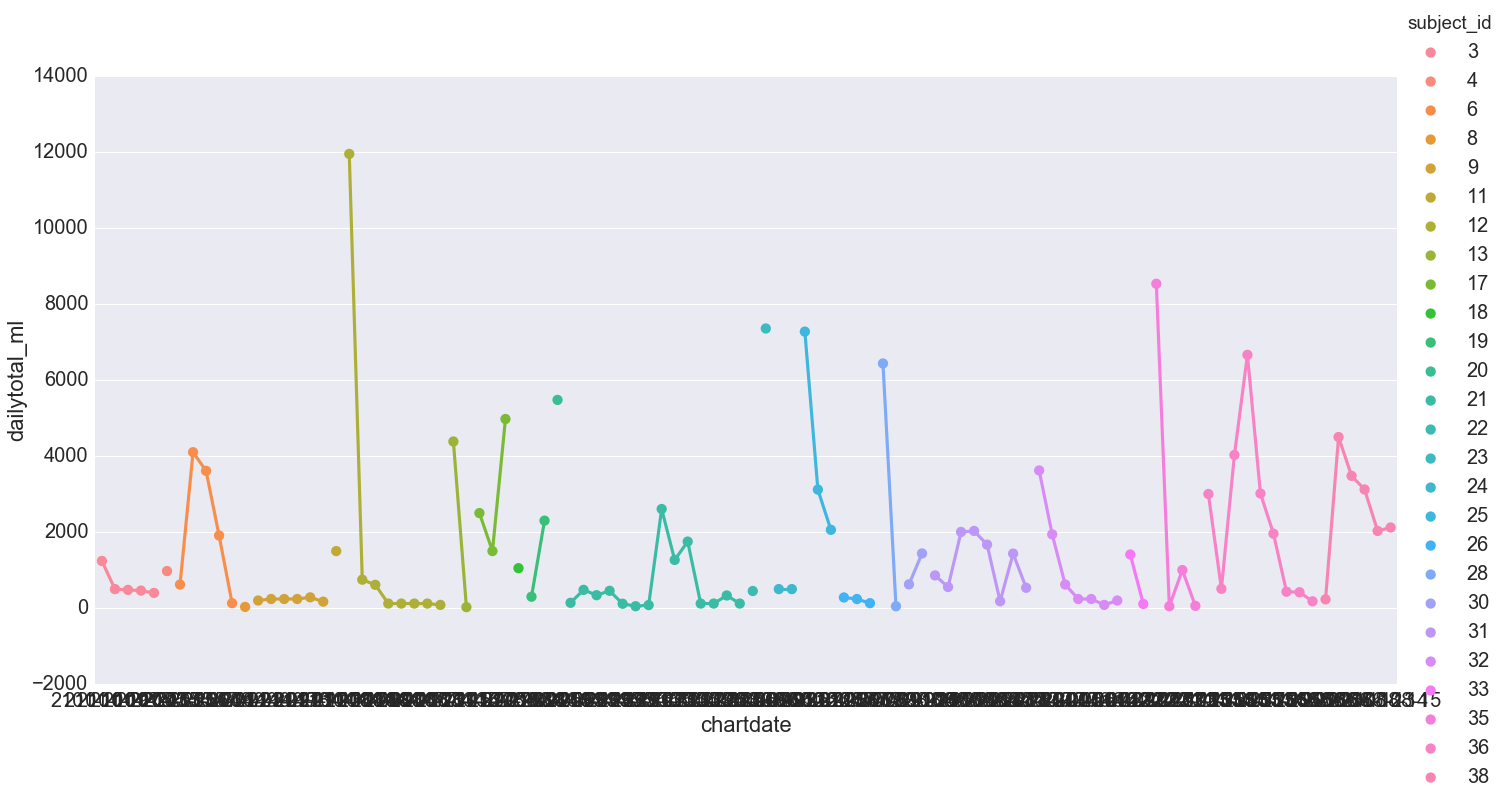

In [15]:
sns.set(font_scale=2)
sns.factorplot(x="chartdate", y="dailytotal_ml", hue="subject_id", data=dfcv.loc[1:100, :], legend='False', size=10, aspect = 2)

In [17]:
sql = """
SELECT *
  FROM mimiciii.apsiii
  """
dfapache = pd.read_sql_query(sql, conn)

In [21]:
# apache score III calculatd using existing code in mimic_code.
dfapache.head()

,subject_id,hadm_id,icustay_id,apsiii,apsiii_prob,hr_score,meanbp_score,temp_score,resprate_score,pao2_aado2_score,...,wbc_score,creatinine_score,uo_score,bun_score,sodium_score,albumin_score,bilirubin_score,glucose_score,acidbase_score,gcs_score
0,55973,152234,200001,63,0.188678,7.0,7.0,0.0,6.0,0.0,...,5.0,7.0,15.0,12.0,0.0,NaN,0.0,0.0,1.0,0.0
1,27513,163557,200003,48,0.102705,7.0,10.0,0.0,9.0,NaN,...,5.0,0.0,0.0,7.0,0.0,0.0,6.0,0.0,1.0,0.0
2,10950,189514,200006,23,0.033927,0.0,7.0,0.0,6.0,NaN,...,0.0,0.0,4.0,0.0,0.0,NaN,NaN,3.0,NaN,0.0
3,20707,129310,200007,33,0.053332,1.0,15.0,0.0,6.0,NaN,...,0.0,0.0,5.0,0.0,0.0,0.0,NaN,3.0,NaN,0.0
4,29904,129607,200009,26,0.038894,1.0,7.0,8.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,NaN,NaN,0.0,3.0,0.0


In [26]:
dfapache.columns

Index([u'subject_id', u'hadm_id', u'icustay_id', u'apsiii', u'apsiii_prob',
       u'hr_score', u'meanbp_score', u'temp_score', u'resprate_score',
       u'pao2_aado2_score', u'hematocrit_score', u'wbc_score',
       u'creatinine_score', u'uo_score', u'bun_score', u'sodium_score',
       u'albumin_score', u'bilirubin_score', u'glucose_score',
       u'acidbase_score', u'gcs_score'],
      dtype='object')